In [1]:
%matplotlib inline

In [2]:
%run setup_environment.py
%run custom_tools.py
%run ml_tools.py

current_conda_env = !echo $CONDA_DEFAULT_ENV
check_conda_env(current_conda_env[0])

Setup environment... done!


✅ <span style='color:green'>Working on **impact-annotator_env** conda environment.</span>

## On local computer


## Mean accuracy: 0.80 ± 0.01
## Mean ROC AUC : 0.80 ± 0.02


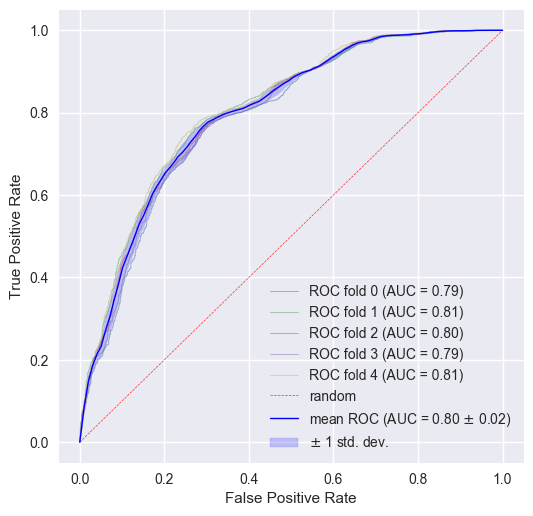

In [3]:
X, y = load_dataset("../../data")

from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
metrics = run_model(model_GaussianNB, X, y, cv_strategy, plot_roc = True, ax = ax)
metrics.drop(['test_fpr', 'test_tpr'], axis = 1, inplace = True)

In [26]:
metrics

,fit_time,score_time,train_accuracy,test_accuracy,train_roc_auc,test_roc_auc,best_parameters
fold_number,,,,,,,
0,0.0938311,0.0509751,0.797739,0.799816,0.79922,0.788132,NaN
1,0.073714,0.0466287,0.795119,0.795404,0.798381,0.806598,NaN
2,0.0726359,0.0439353,0.793511,0.79761,0.79502,0.799848,NaN
3,0.0797648,0.0469902,0.796498,0.800735,0.796747,0.793025,NaN
4,0.0748892,0.0429571,0.79875,0.807169,0.798306,0.80942,NaN


## On Selene

In [6]:
%run Selene_Job.ipy

In [7]:
job = Selene_Job("Gaussian_NB_test")

➞ mkdir ssh_remote_jobs/job_Gaussian_NB_test


In [8]:
%%writefile {job.local_job_directory_path}/script.py
print("Setup environment...", end = "")
import sys
sys.path.append("../../")

from ml_tools import *
print(" done!")

print("Run model...")
from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()
X, y = load_dataset("../../../../data")
metrics = run_model(model_GaussianNB, X, y, cv_strategy, print_fold_metrics = True)

print("Save metrics...", end = "")
metrics.to_pickle("metrics.pkl")
print(" done!")

Writing ssh_remote_jobs/job_Gaussian_NB_test/script.py


In [9]:
job.run()

➞ scp ssh_remote_jobs/job_Gaussian_NB_test to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.py                                     100%  570    17.5KB/s   00:00    
➞ Logged in /home/guilminp on selene.cbio.private
➞ Load ~/.bash_profile
Hi Pierre!
➞ Work on impact-annotator_env python virtualenv
➞ Launch job in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_Gaussian_NB_test
Job <28062744> is submitted to default queue <sol>.


In [18]:
job.get_results()

✅ <span style='color:green'>Job \< Gaussian_NB_test \> finished !</span><br>

➞ scp guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_Gaussian_NB_test documents to ssh_remote_jobs/job_Gaussian_NB_test
metrics.pkl                                   100%  118KB   3.1MB/s   00:00    
job_output.txt                                100% 1847   382.6KB/s   00:00    
➞ Load metrics.pkl in pandas dataframe


,fit_time,score_time,train_accuracy,test_accuracy,train_roc_auc,test_roc_auc,test_fpr,test_tpr,best_parameters
fold_number,,,,,,,,,
0,0.069011,0.0377004,0.797739,0.799816,0.79922,0.788132,"[0.0, 0.001388888888888889, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.002777777777777778, 0.002777777777777778, 0.003472222222222222, 0.003472222222222222, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004861111111111111, 0.004861111111111111, 0.004861111111111111, 0.004861111111111111, 0.005555555555555556, 0.005555555555555556, 0.005555555555555556, 0.005555555555555556, 0.00625, 0.00625, 0.008333333333333333, 0.008333333333333333, 0.009027777777777777, 0.009027777777777777, 0.009027777777777777, 0.009027777777777777, 0.009722222222222222, 0.009722222222222222, 0.010416666666666666, 0.010416666666666666, 0.011111111111111112, 0.011111111111111112, 0.011805555555555555, 0.011805555555555555, 0.0125, 0.0125, 0.013888888888888888, 0.013888888888888888, ...","[0.0, 0.036, 0.03625, 0.0365, 0.037, 0.039, 0.0405, 0.041, 0.042, 0.0425, 0.043, 0.04625, 0.04625, 0.04775, 0.04775, 0.052, 0.052, 0.057, 0.0575, 0.05975, 0.05975, 0.0625, 0.063, 0.06425, 0.06425, 0.0665, 0.067, 0.0675, 0.0675, 0.06825, 0.06825, 0.072, 0.072, 0.0785, 0.079, 0.08175, 0.082, 0.0885, 0.0885, 0.08925, 0.08925, 0.0905, 0.0905, 0.09225, 0.09225, 0.104, 0.104, 0.10625, 0.10625, 0.11, 0.11, 0.11025, 0.11025, 0.11125, 0.11125, 0.11275, 0.11275, 0.1165, 0.1165, 0.11675, 0.11675, 0.1175, 0.1175, 0.1185, 0.1185, 0.121, 0.121, 0.1245, 0.1245, 0.13375, 0.13375, 0.13525, 0.13525, 0.13775, 0.13775, 0.139, 0.139, 0.14025, 0.14025, 0.14325, 0.14325, 0.14375, 0.14375, 0.14925, 0.14975, 0.16075, 0.16075, 0.165, 0.165, 0.16625, 0.16625, 0.16775, 0.16775, 0.169, 0.169, 0.1705, 0.1705, 0.172, 0.172, 0.1725, ...]",NaN
1,0.0573041,0.0328269,0.795119,0.795404,0.798381,0.806598,"[0.0, 0.002777777777777778, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.003472222222222222, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004166666666666667, 0.004861111111111111, 0.004861111111111111, 0.005555555555555556, 0.005555555555555556, 0.00625, 0.00625, 0.007638888888888889, 0.007638888888888889, 0.008333333333333333, 0.008333333333333333, 0.009027777777777777, 0.009027777777777777, 0.009722222222222222, 0.009722222222222222, 0.010416666666666666, 0.010416666666666666, 0.011111111111111112, 0.011111111111111112, 0.011111111111111112, 0.011111111111111112, 0.011805555555555555, 0.011805555555555555, 0.0125, 0.0125, 0.013194444444444444, 0.01319444...","[0.0, 0.03825, 0.03825, 0.0385, 0.03925, 0.0395, 0.04, 0.04025, 0.04175, 0.0425, 0.04275, 0.04325, 0.044, 0.0445, 0.045, 0.0455, 0.052, 0.052, 0.056, 0.0565, 0.0595, 0.06, 0.06325, 0.06325, 0.06475, 0.06475, 0.07075, 0.07075, 0.071, 0.071, 0.0715, 0.0715, 0.07425, 0.07425, 0.0745, 0.0745, 0.08175, 0.08175, 0.08275, 0.08275, 0.08325, 0.08375, 0.091, 0.091, 0.099, 0.099, 0.10325, 0.10325, 0.10975, 0.11025, 0.1225, 0.1225, 0.128, 0.128, 0.1395, 0.1395, 0.14775, 0.14775, 0.1515, 0.1515, 0.15275, 0.15275, 0.16725, 0.16725, 0.1675, 0.1675, 0.16825, 0.16825, 0.16975, 0.16975, 0.172, 0.172, 0.17675, 0.17675, 0.18125, 0.18125, 0.182, 0.182, 0.18475, 0.18475, 0.18625, 0.18625, 0.19025, 0.19025, 0.19075, 0.19075, 0.19375, 0.19375, 0.1955, 0.1955, 0.1965, 0.1965, 0.19725, 0.19725, 0.20125, 0.20125, 0.20375, 0.20375, 0.20425, 0.20425, ...]",NaN
2,0.0708392,0.0419118,0.793511,0.79761,0.79502,0.799848,"[0.0, 0.0041666666666666

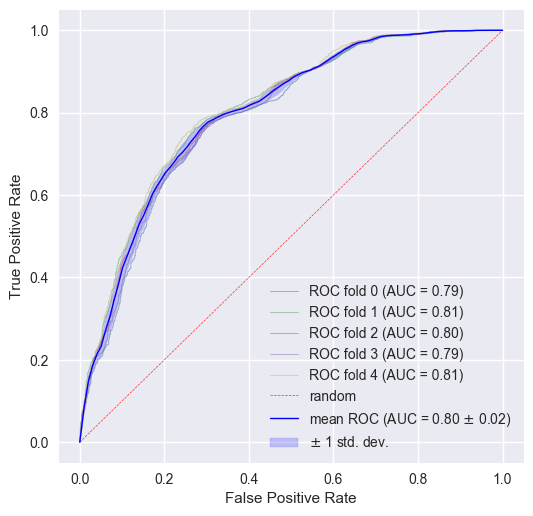

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
plot_roc_(job.metrics.shape[0], job.metrics, ax)

In [2]:
job_random_forest_gs = Selene_Job("random_forest_gs")

➞ mkdir ssh_remote_jobs/job_random_forest_gs


CalledProcessError: Command 'mkdir ssh_remote_jobs/job_random_forest_gs' returned non-zero exit status 1.

In [3]:
%%writefile {job_random_forest_gs.local_job_directory_path}/script.py
print("Setup environment...", end = "")
import sys
sys.path.append("../../")

from ml_tools import *
print(" done!")

print("Run model...")
from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.model_selection import GridSearchCV
inner_cv_strategy = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier
parameters_grid = [
    {'n_estimators': [10, 100, 1000], 'max_depth': [5, 20, 50]}
]

model_GS_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), parameters_grid, cv = inner_cv_strategy, scoring = 'roc_auc', refit = True)
X, y = load_dataset("../../../../data")
metrics = run_model(model_GS_RandomForestClassifier, X, y, cv_strategy, grid_search = True, print_grid_search_metrics = True, print_fold_metrics = True)

print("Save metrics...", end = "")
metrics.to_csv("metrics.csv")
print(" done!")

Writing {job_random_forest_gs.local_job_directory_path}/script.py


FileNotFoundError: [Errno 2] No such file or directory: '{job_random_forest_gs.local_job_directory_path}/script.py'

In [4]:
job_random_forest_gs.run()

➞ scp ssh_remote_jobs/job_random_forest_gs to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs


UsageError: Line magic function `%scp` not found.


In [50]:
job_random_forest_gs.get_results()

✅ <span style='color:green'>Job \< random_forest_gs \> finished !</span><br>

➞ scp guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_random_forest_gs documents to ssh_remote_jobs/job_random_forest_gs
metrics.csv                                   100% 1441    70.6KB/s   00:00    
job_output.txt                                100% 6640   369.8KB/s   00:00    
➞ Load metrics.csv in pandas dataframe


,fold_number,fit_time,score_time,train_accuracy,test_accuracy,train_roc_auc,test_roc_auc,test_fpr,test_tpr,best_parameters
0,0,245.967178,5.125430,1.000000,0.887684,1.000000,0.894227,[0. 0. 0. ... 0.945138...,[0. 0.00575 0.006 ... 1. 1. 1...,"{'max_depth': 50, 'n_estimators': 1000}"
1,1,234.818180,3.475672,0.929041,0.880331,0.965213,0.902384,[0. 0. 0. ... 0.965972...,[0.00e+00 2.50e-04 4.35e-02 ... 1.00e+00 1.00e...,"{'max_depth': 20, 'n_estimators': 1000}"
2,2,226.128261,3.532764,0.928443,0.879779,0.966058,0.891810,[0. 0. 0. ... 0.977083...,[0.0e+00 2.5e-04 3.5e-02 ... 1.0e+00 1.0e+00 1...,"{'max_depth': 20, 'n_estimators': 1000}"
3,3,294.917571,7.385947,1.000000,0.884375,1.000000,0.892617,[0. 0. 0. ... 0.916666...,[0. 0.00875 0.009 ... 0.99975 0.99975 1...,"{'max_depth': 50, 'n_estimators': 1000}"
4,4,289.754549,5.210357,1.000000,0.885662,1.000000,0.896756,[0. 0. 0. ... 0.947222...,[0. 0.00625 0.0065 ... 1. 1. 1...,"{'max_depth': 50, 'n_estimators': 1000}"
